# Student information

Full name: Huy Le Nhat

Student_ID: 20520056

Class: CS410.N11

# Libraries and Functions

In [121]:
import numpy as np

In [122]:
def initialize_population( num_individuals, num_variables, random_seed=20520056):
    # Đặt lại random_seed
    np.random.seed(random_seed)
    """
    Khởi tạo quần thể gồm num_individuals cá thể. Mỗi cá thể có num_parameters biến.
    
    Arguments:
    num_individuals -- Số lượng cá thể
    num_variables -- Số lượng biến
    
    Returns:
    pop -- Ma trận (num_individuals, num_variables ) chứa quần thể mới được khởi tạo ngẫu nhiên.
    """
    
    ### BẮT ĐẦU CODE TỪ ĐÂY ### 
    # pop = np.random.randint(2, size=(num_individuals, num_variables))
    pop = np.array([[]] * num_individuals, dtype=np.int_)
    for idx in range(num_variables):
        column = [x for x in range(2) for i in range(num_individuals//2)]
        np.random.shuffle(column)
        pop = np.hstack((pop, np.array([column]).T))
      
    ### DỪNG CODE TẠI ĐÂY ###
    
    return pop

In [123]:
def onemax( ind ):
    """
    Hàm đánh giá OneMax: Đếm số bit 1 trong chuỗi nhị phân (cá thể ind).
    
    Arguments:
    ind -- Cá thể cần được đánh giá.

    Returns:
    value -- Giá trị của cá thể ind.
    """
    
    ### BẮT ĐẦU CODE TỪ ĐÂY ###     
    value = np.sum(ind)
    
    ### DỪNG CODE TẠI ĐÂY ###
    
    return value

In [124]:
def truncation_selection(pop, pop_fitness, selection_size):
    selected_indices = np.argsort(pop_fitness)[-selection_size:]
    return selected_indices

In [125]:
def tournament_selection(pop, pop_fitness, selection_size, tournament_size=4):
    num_individuals = len(pop)
    indices = [idx for idx in range(num_individuals)]
    selected_indices = []
    for iter in range(selection_size):
        ids = np.random.choice(indices, tournament_size)
        ids_fitness = np.array(pop_fitness)[ids]
        idx = ids[np.argmax(ids_fitness)]
        selected_indices.append(idx)
    return selected_indices

    # num_individuals = len(pop)
    # indices = [idx for idx in range(num_individuals)] * tournament_size
    # np.random.shuffle(indices)
    # selected_indices = []
    # for iter in range(selection_size):
    #     ids = indices[iter*tournament_size: (iter+1)*tournament_size]
    #     ids_fitness = np.array(pop_fitness)[ids]
    #     idx = ids[np.argmax(ids_fitness)]
    #     selected_indices.append(idx)
    # return selected_indices

In [126]:
def crossover(pop, crossover_type='UX'):
    """
    Hàm biến đổi tạo ra các cá thể con.
    
    Arguments:
    pop -- Quàn thể hiện tại.

    Returns:
    offspring -- Quần thể chứa các cá thể con được sinh ra.
    """  
    
    ### BẮT ĐẦU CODE TỪ ĐÂY ### 
    num_individuals = len(pop)
    num_parameters = len(pop[0])
    indices = np.arange(num_individuals)
    # Đảo ngẫu nhiên thứ tự các cá thể trong quần thể
    np.random.shuffle(indices)
    offspring = []
    
    for i in range(0, num_individuals, 2):
        idx1 = indices[i]
        idx2 = indices[i+1]
        offspring1 = list(pop[idx1])
        offspring2 = list(pop[idx2])
        
        # Cài đặt phép lai đồng nhất uniform crossover. 
        # Không cần cài đặt đột biến mutation.
        if crossover_type == 'UX':
          for idx in range(0, num_parameters):
              r = np.random.rand()
              if r < 0.5:
                  offspring1[idx], offspring2[idx] = offspring2[idx], offspring1[idx]

        elif crossover_type == '1X':
            crossover_pos = np.random.randint(num_parameters)
            for idx in range(crossover_pos, num_parameters):
                offspring1[idx], offspring2[idx] = offspring2[idx], offspring1[idx]

        elif crossover_type == '2X':
            crossover_pos1, crossover_pos2 = np.random.randint(num_parameters, size=2)
            if crossover_pos1 > crossover_pos2:
                crossover_pos1, crossover_pos2 = crossover_pos2, crossover_pos1
            for idx in range(crossover_pos1, crossover_pos2):
                offspring1[idx], offspring2[idx] = offspring2[idx], offspring1[idx]

        offspring.append(offspring1)
        offspring.append(offspring2)


    ### DỪNG CODE TẠI ĐÂY ###
    
    offspring = np.array(offspring)
    return offspring

In [127]:
def mutation(pop, mutation_prob):
    num_individuals = len(pop)
    num_parameters = len(pop[0])
    for i in range(0, num_individuals):
        for j in range(0, num_parameters):
            r = np.random.rand()
            if r < mutation_prob:
                if pop[i][j] == 0:
                    pop[i][j] = 1
                else:
                    pop[i][j] = 0
    
    return pop

In [128]:
def genetic_algorithm(num_individuals, num_parameters, num_generations, crossover_type='UX', fitness_function=onemax, enable_mutation=True, details=True):
    pop = initialize_population(num_individuals, num_parameters)
    pop_fitness = np.array([fitness_function(ind) for ind in pop])
    if details == True:
        print('Original population:')
        print(pop)
        print("#Gen 0:")
        print(pop_fitness)
    selection_size = num_individuals // 2
    
    for i in range(num_generations):
        selected_indices = truncation_selection( pop, pop_fitness, selection_size )
        selection_set = pop[selected_indices]
        selection_fitness = pop_fitness[selected_indices]

        offspring = crossover(selection_set)
        if enable_mutation == True:
            offspring = mutation(offspring, 0.05)
        offspring_fitness = np.array([fitness_function(ind) for ind in offspring])

        pop = np.vstack([selection_set, offspring])
        pop_fitness = np.concatenate((selection_fitness, offspring_fitness))

        if details == True:
            print(f'#Gen {i+1}:')
            print(pop_fitness)
    
    if details == True:
        print('#Final result:')
        print(pop)
        print(pop_fitness)

    if pop_fitness.max() == num_parameters:
        return True
    else:
        return False


In [129]:
def genetic_algorithm_POPOP(num_individuals, num_parameters, num_generations, crossover_type='UX', fitness_function=onemax, tournament_size=4, enable_mutation=True, details=True):
    pop = initialize_population(num_individuals, num_parameters)
    pop_fitness = np.array([fitness_function(ind) for ind in pop])
    if details == True:
        print('Original population:')
        print(pop)
        print("#Gen 0:")
        print(pop_fitness)
    selection_size = num_individuals
    
    for i in range(num_generations):
        offspring = crossover(pop)
        if enable_mutation == True:
            offspring = mutation(offspring, 0.05)
        offspring_fitness = np.array([fitness_function(ind) for ind in offspring])

        pop = np.vstack([pop, offspring])
        pop_fitness = np.concatenate((pop_fitness, offspring_fitness))

        selected_indices = tournament_selection( pop, pop_fitness, selection_size, tournament_size)
        pop = pop[selected_indices]
        pop_fitness = pop_fitness[selected_indices]

        if details == True:
            print(f'#Gen {i+1}:')
            print(pop_fitness)
    
    if details == True:
        print('#Final result:')
        print(pop)
        print(pop_fitness)

    if pop_fitness.max() == num_parameters:
        return True
    else:
        return False

In [130]:
# Testing
np.random.seed(20520056)
num_parameters = 8
num_individuals = 8
num_generations = 10
crossover_type = 'UX'
fitness_function = onemax
tournament_size = 4
enable_mutation = True

genetic_algorithm(num_individuals, num_parameters, num_generations, 
                  crossover_type, fitness_function, enable_mutation = enable_mutation, details=True)
genetic_algorithm_POPOP(num_individuals, num_parameters, num_generations, 
                  crossover_type, fitness_function, tournament_size, enable_mutation = enable_mutation, details=True)

Original population:
[[0 1 1 1 1 0 0 1]
 [1 1 0 1 0 1 0 1]
 [0 0 1 1 0 1 1 1]
 [1 0 1 1 1 0 0 0]
 [0 1 0 0 1 0 0 0]
 [0 0 1 0 1 1 1 1]
 [1 1 0 0 0 1 1 0]
 [1 0 0 0 0 0 1 0]]
#Gen 0:
[5 5 5 4 2 5 4 2]
#Gen 1:
[5 5 5 5 6 5 6 6]
#Gen 2:
[5 6 6 6 7 4 5 6]
#Gen 3:
[6 6 6 7 7 6 6 6]
#Gen 4:
[6 6 7 7 6 6 7 8]
#Gen 5:
[7 7 7 8 8 6 7 7]
#Gen 6:
[7 7 8 8 6 7 7 7]
#Gen 7:
[7 7 8 8 8 8 8 6]
#Gen 8:
[8 8 8 8 8 8 8 8]
#Gen 9:
[8 8 8 8 7 8 8 8]
#Gen 10:
[8 8 8 8 8 7 8 7]
#Final result:
[[1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [0 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 0 1 1]]
[8 8 8 8 8 7 8 7]
Original population:
[[0 1 1 1 1 0 0 1]
 [1 1 0 1 0 1 0 1]
 [0 0 1 1 0 1 1 1]
 [1 0 1 1 1 0 0 0]
 [0 1 0 0 1 0 0 0]
 [0 0 1 0 1 1 1 1]
 [1 1 0 0 0 1 1 0]
 [1 0 0 0 0 0 1 0]]
#Gen 0:
[5 5 5 4 2 5 4 2]
#Gen 1:
[5 5 5 5 5 5 5 5]
#Gen 2:
[6 5 6 5 5 5 5 5]
#Gen 3:
[7 5 6 6 6 6 6 5]
#Gen 4:
[6 6 7 5 6 6 6 7]
#Gen 5:
[6 7 7 7 6 6 6 6]
#Gen 6:
[7 6 6 7 7 7 7 

True

# Exercise 1

Trong bài tập này, các em hãy cài đặt lại Genetic Algorithm theo bản cài đặt POPOP (không sử dụng mutation).

Hãy thực nghiệm bản cài đặt của mình với các problem size của hàm OneMax tăng dần như sau: 8, 16, 32, 64, 128

Ở đầu mỗi lượt chạy, khi khởi tạo quần thể, thì cần đặt lại random seed. Hãy chọn random seed là MSSV của mình.

Với mỗi problem size, hãy chọn ra population size có khả năng tìm ra được lời giải tối ưu (không chạy quá 50 thế hệ). Trong file nộp cần thể hiện kết quả của 01 lượt chạy thành công.

## Testing

In [131]:
problem_sizes_list = [8, 16, 32, 64, 128]
num_repetitions = 5
max_upper_bound = 8192
max_num_generations = 50
np.random.seed(20520056)

In [132]:
# Chạy thử với mỗi problem size
for num_parameters in problem_sizes_list:
    print('#Num parameter:', num_parameters)
    
    num_parameters = num_parameters
    num_individuals = 8
    num_generations = 10
    crossover_type = 'UX'
    fitness_function = onemax
    tournament_size = 4
    enable_mutation = False

    print('#Genetic algorithm:')
    genetic_algorithm(num_individuals, num_parameters, num_generations, 
                      crossover_type, fitness_function, enable_mutation = enable_mutation, details=True)
    print('#Genetic algorithm POPOP:')
    genetic_algorithm_POPOP(num_individuals, num_parameters, num_generations, 
                      crossover_type, fitness_function, tournament_size, enable_mutation = enable_mutation, details=True)

#Num parameter: 8
#Genetic algorithm:
Original population:
[[0 1 1 1 1 0 0 1]
 [1 1 0 1 0 1 0 1]
 [0 0 1 1 0 1 1 1]
 [1 0 1 1 1 0 0 0]
 [0 1 0 0 1 0 0 0]
 [0 0 1 0 1 1 1 1]
 [1 1 0 0 0 1 1 0]
 [1 0 0 0 0 0 1 0]]
#Gen 0:
[5 5 5 4 2 5 4 2]
#Gen 1:
[5 5 5 5 5 5 4 6]
#Gen 2:
[5 5 5 6 5 6 5 5]
#Gen 3:
[5 5 6 6 5 6 6 5]
#Gen 4:
[6 6 6 6 5 7 6 6]
#Gen 5:
[6 6 6 7 6 6 7 6]
#Gen 6:
[6 6 7 7 6 7 6 7]
#Gen 7:
[7 7 7 7 6 8 7 7]
#Gen 8:
[7 7 7 8 7 8 7 7]
#Gen 9:
[7 7 8 8 8 8 7 7]
#Gen 10:
[8 8 8 8 8 8 8 8]
#Final result:
[[1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]]
[8 8 8 8 8 8 8 8]
#Genetic algorithm POPOP:
Original population:
[[0 1 1 1 1 0 0 1]
 [1 1 0 1 0 1 0 1]
 [0 0 1 1 0 1 1 1]
 [1 0 1 1 1 0 0 0]
 [0 1 0 0 1 0 0 0]
 [0 0 1 0 1 1 1 1]
 [1 1 0 0 0 1 1 0]
 [1 0 0 0 0 0 1 0]]
#Gen 0:
[5 5 5 4 2 5 4 2]
#Gen 1:
[5 5 5 6 6 5 6 5]
#Gen 2:
[6 6 7 5 7 6 6 5]
#Gen 3:
[7 7 7 7 7 7 7 6]
#Gen 4:
[7 

## Genetic algorithm (original)

In [141]:
best_num_individuals_list = []

for num_parameters in problem_sizes_list:
    print('#Num parameter:', num_parameters)

    # Tìm upper_bound của num_individuals
    upper_bound = 4
    while upper_bound < max_upper_bound:
        num_parameters = num_parameters
        num_individuals = upper_bound
        num_generations = max_num_generations
        crossover_type = 'UX'
        fitness_function = onemax
        # tournament_size = 4
        enable_mutation = False

        success = True
        for iter in range(num_repetitions):
            cur_success = genetic_algorithm(num_individuals, num_parameters, num_generations, 
                              crossover_type, fitness_function, enable_mutation = enable_mutation, details=False)
            if cur_success == False:
                success = False
                break
        if success == True:
            break
        else:
            upper_bound *= 2
    
    # Tìm num_individuals tốt nhất
    lower_bound = upper_bound // 2
    while upper_bound - lower_bound > 4:
        middle = (lower_bound + upper_bound) // 2
        num_parameters = num_parameters
        num_individuals = middle
        num_generations = 50
        crossover_type = 'UX'
        fitness_function = onemax
        # tournament_size = 4
        enable_mutation = False

        success = True
        for iter in range(num_repetitions):
            cur_success = genetic_algorithm(num_individuals, num_parameters, num_generations, 
                              crossover_type, fitness_function, enable_mutation = enable_mutation, details=False)
            if cur_success == False:
                success = False
                break
        if success == True:
            upper_bound = middle
        else:
            lower_bound = middle + 1

    print('The best number of individuals =', upper_bound)
    best_num_individuals_list.append(upper_bound)

print(best_num_individuals_list)
best_num_individuals_list_original = best_num_individuals_list[:]

#Num parameter: 8
The best number of individuals = 8
#Num parameter: 16
The best number of individuals = 20
#Num parameter: 32
The best number of individuals = 20
#Num parameter: 64
The best number of individuals = 28
#Num parameter: 128
The best number of individuals = 72
[8, 20, 20, 28, 72]


## Genetic algorithm (POPOP)

In [142]:
best_num_individuals_list = []

for num_parameters in problem_sizes_list:
    print('#Num parameter:', num_parameters)

    # Tìm upper_bound của num_individuals
    upper_bound = 4
    while upper_bound < max_upper_bound:
        num_parameters = num_parameters
        num_individuals = upper_bound
        num_generations = max_num_generations
        crossover_type = 'UX'
        fitness_function = onemax
        tournament_size = 4
        enable_mutation = False

        success = True
        for iter in range(num_repetitions):
            cur_success = genetic_algorithm_POPOP(num_individuals, num_parameters, num_generations, 
                              crossover_type, fitness_function, tournament_size, enable_mutation = enable_mutation, details=False)
            if cur_success == False:
                success = False
                break
        if success == True:
            break
        else:
            upper_bound *= 2
    
    # Tìm num_individuals tốt nhất
    lower_bound = upper_bound // 2
    while upper_bound - lower_bound > 4:
        middle = (lower_bound + upper_bound) // 2
        num_parameters = num_parameters
        num_individuals = middle
        num_generations = 50
        crossover_type = 'UX'
        fitness_function = onemax
        tournament_size = 4
        enable_mutation = False

        success = True
        for iter in range(num_repetitions):
            cur_success = genetic_algorithm_POPOP(num_individuals, num_parameters, num_generations, 
                              crossover_type, fitness_function, tournament_size, enable_mutation = enable_mutation, details=False)
            if cur_success == False:
                success = False
                break
        if success == True:
            upper_bound = middle
        else:
            lower_bound = middle + 1

    print('The best number of individuals =', upper_bound)
    best_num_individuals_list.append(upper_bound)

print(best_num_individuals_list)
best_num_individuals_list_POPOP = best_num_individuals_list[:]

#Num parameter: 8
The best number of individuals = 4
#Num parameter: 16
The best number of individuals = 12
#Num parameter: 32
The best number of individuals = 40
#Num parameter: 64
The best number of individuals = 68
#Num parameter: 128
The best number of individuals = 120
[4, 12, 40, 68, 120]


## Conclusion

In [143]:
print(best_num_individuals_list_original)
print(best_num_individuals_list_POPOP)

[8, 20, 20, 28, 72]
[4, 12, 40, 68, 120]


In [144]:
from matplotlib import pyplot as plt

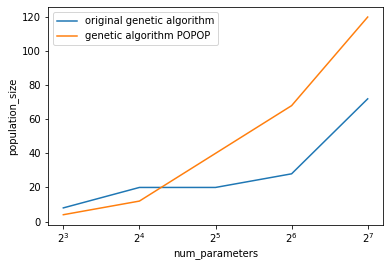

In [158]:
plt.xscale('log', basex=2)
plt.plot(problem_sizes_list, best_num_individuals_list_original, label='original genetic algorithm')
plt.plot(problem_sizes_list, best_num_individuals_list_POPOP, label='genetic algorithm POPOP')
plt.xlabel('num_parameters')
plt.ylabel('population_size')
plt.legend()
plt.show()

***Nhận xét:***
- Với tournament_size = 4, genetic_algorithm_POPOP yêu cầu population_size lớn hơn so với genetic_algorithm (original)
- Genetic_algorithm_POPOP có độ tăng trưởng population_size tỉ lệ thuận với problem_size (num_parameters) (~O(N), ~O(N)) 
- Genetic_algorithm (original) chưa nhận xét được do chưa thể hiện rõ ràng qua thực nghiệm